In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# --- Metrics ---
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Read data

In [3]:
df = pd.read_csv("df_final_bh_amazonas.csv")

In [4]:
df.head(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
0,2015-01-01,Thu,3,1,1,0,1,0,33.9,20.6,25.912500,89.0,32.0,30,0.0,NaN,68.0,NaN,82.0
1,2015-01-02,Fri,4,1,1,0,0,1,32.9,21.0,26.050000,87.0,38.0,43,0.0,NaN,79.0,NaN,83.0
2,2015-01-03,Sat,5,1,1,1,0,0,33.5,20.2,26.683333,83.0,38.0,23,0.0,NaN,44.0,NaN,83.0
3,2015-01-04,Sun,6,1,1,1,0,0,30.6,22.2,25.641667,81.0,43.0,20,0.0,NaN,49.0,NaN,82.0
4,2015-01-05,Mon,0,2,1,0,0,0,30.8,20.8,25.520833,79.0,36.0,51,0.0,NaN,59.0,NaN,82.0
5,2015-01-06,Tue,1,2,1,0,0,0,29.5,20.5,25.016667,79.0,41.0,23,0.0,NaN,54.0,NaN,82.0
6,2015-01-07,Wed,2,2,1,0,0,0,28.0,19.9,23.925000,78.0,44.0,43,0.0,NaN,54.0,NaN,82.0
7,2015-01-08,Thu,3,2,1,0,0,0,30.4,19.7,24.229167,74.0,30.0,49,NaN,NaN,66.0,NaN,82.0
8,2015-01-09,Fri,4,2,1,0,0,0,30.5,19.6,24.579167,68.0,28.0,39,NaN,NaN,61.0,NaN,82.0
9,2015-01-10,Sat,5,2,1,1,0,0,32.6,20.6,25.887500,73.0,33.0,19,NaN,NaN,51.0,NaN,82.0


In [5]:
df.tail(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
1816,2019-12-22,Sun,6,51,12,1,0,0,32.9,20.3,26.037500,84.0,34.0,34,0.0,14.0,NaN,7.0,NaN
1817,2019-12-23,Mon,0,52,12,0,0,0,25.9,19.0,22.291667,91.0,59.0,47,NaN,14.0,NaN,7.0,NaN
1818,2019-12-24,Tue,1,52,12,0,0,0,24.6,17.6,21.175000,91.0,65.0,37,NaN,13.0,NaN,6.0,NaN
1819,2019-12-25,Wed,2,52,12,0,1,0,30.3,17.4,23.525000,91.0,36.0,59,NaN,8.0,NaN,6.0,NaN
1820,2019-12-26,Thu,3,52,12,0,0,1,30.4,20.8,25.000000,79.0,37.0,71,NaN,9.0,NaN,5.0,NaN
1821,2019-12-27,Fri,4,52,12,0,0,0,29.1,19.9,24.016667,83.0,40.0,48,NaN,9.0,NaN,6.0,NaN
1822,2019-12-28,Sat,5,52,12,1,0,0,28.6,19.7,23.245833,88.0,44.0,39,NaN,10.0,NaN,6.0,NaN
1823,2019-12-29,Sun,6,52,12,1,0,0,29.4,18.8,22.333333,90.0,40.0,36,NaN,8.0,NaN,5.0,NaN
1824,2019-12-30,Mon,0,1,12,0,0,0,29.3,18.1,22.958333,84.0,32.0,41,NaN,8.0,NaN,5.0,NaN
1825,2019-12-31,Tue,1,1,12,0,0,0,29.9,18.8,24.045833,79.0,37.0,49,NaN,8.0,NaN,5.0,NaN


In [6]:
df.count()

Date                 1826
DayOfWeek            1826
DayOfWeekNum         1826
WeekOfYear           1826
Month                1826
IsWeekend            1826
IsHoliday            1826
IsDayAfterHoliday    1826
temp_max             1826
temp_min             1826
temp_mean            1826
humidity_max         1826
humidity_min         1826
NUMBER_INT           1826
CO                   1581
MP10                 1457
O3                   1265
MP2.5                1195
SO2                  1091
dtype: int64

### Set features

In [ ]:
selected_cols_final = [
    'Date',
    'DayOfWeekNum',
    'WeekOfYear',
#    'Month',
#    'IsWeekend',
    'IsHoliday',
    'NUMBER_INT',
    # 'SO2',
    'temp_max',
    'temp_min',
    'humidity_max',
]

df_final = df[selected_cols_final].copy()

In [8]:
# add lag
# df_final['SO2_lag1'] = df_final['SO2'].shift(1)
# df_final['SO2_lag2'] = df_final['SO2'].shift(2)
# df_final['SO2_lag3'] = df_final['SO2'].shift(3)

# df_final['temp_min_lag1'] = df_final['temp_min'].shift(1)
# df_final['temp_min_lag2'] = df_final['temp_min'].shift(2)
# df_final['temp_min_lag3'] = df_final['temp_min'].shift(3)

# df_final['humidity_max_lag1'] = df_final['humidity_max'].shift(1)
# df_final['humidity_max_lag2'] = df_final['humidity_max'].shift(2)
# df_final['humidity_max_lag3'] = df_final['humidity_max'].shift(3)

In [9]:
df_final = df_final.dropna()

In [10]:
# Check non-null counts and data types
df_final.info()

# Check descriptive statistics
df_final.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1826 non-null   object 
 1   DayOfWeekNum  1826 non-null   int64  
 2   WeekOfYear    1826 non-null   int64  
 3   Month         1826 non-null   int64  
 4   IsWeekend     1826 non-null   int64  
 5   IsHoliday     1826 non-null   int64  
 6   NUMBER_INT    1826 non-null   int64  
 7   temp_max      1826 non-null   float64
 8   temp_min      1826 non-null   float64
 9   humidity_max  1826 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 142.8+ KB


,Date,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max
count,1826,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
unique,1826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.000548,26.615553,6.523549,0.285871,0.024644,47.780394,28.314513,17.791347,82.264513
std,NaN,2.000959,15.065085,3.449478,0.451952,0.155080,15.631632,3.044044,2.625865,9.226503
min,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,11.000000,17.800000,7.300000,42.000000
25%,NaN,1.000000,14.000000,4.000000,0.000000,0.000000,37.000000,26.300000,16.100000,77.000000
50%,NaN,3.000000,27.000000,7.000000,0.000000,0.000000,47.000000,28.500000,18.400000,84.000000
75%,NaN,5.000000,40.000000,10.000000,1.000000,0.000000,59.000000,30.475000,19.700000,90.000000


In [11]:
df_final.dtypes

Date             object
DayOfWeekNum      int64
WeekOfYear        int64
Month             int64
IsWeekend         int64
IsHoliday         int64
NUMBER_INT        int64
temp_max        float64
temp_min        float64
humidity_max    float64
dtype: object

## Train

In [12]:
df_final['Date'] = pd.to_datetime(df_final['Date'])
# df_final = df_final.sort_values(by='Date')

# remove the last 5 days (account for lag ...)
df_final = df_final[:-5]

# Range for training and testing (4 years for training, 1 year for validation)
min_year = df_final['Date'].dt.year.min()
train_mask = df_final['Date'].dt.year < (min_year + 4)
val_mask = df_final['Date'].dt.year == (min_year + 4)



df_train = df_final[train_mask]
df_val = df_final[val_mask]

df_train = df_train.drop(columns=['Date'])
df_val = df_val.drop(columns=['Date'])

X = df_final.drop(columns=['Date', 'NUMBER_INT'])
y = df_final['NUMBER_INT']


X_train = df_train.drop(columns=['NUMBER_INT'])
y_train = df_train['NUMBER_INT']

X_val = df_val.drop(columns=['NUMBER_INT'])
y_val = df_val['NUMBER_INT']

In [13]:
df_train.head()

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max
0,3,1,1,0,1,30,33.9,20.6,89.0
1,4,1,1,0,0,43,32.9,21.0,87.0
2,5,1,1,1,0,23,33.5,20.2,83.0
3,6,1,1,1,0,20,30.6,22.2,81.0
4,0,2,1,0,0,51,30.8,20.8,79.0


In [14]:
df_train.tail()

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max
1456,3,52,12,0,0,60,24.8,18.8,92.0
1457,4,52,12,0,0,61,25.4,18.5,92.0
1458,5,52,12,1,0,30,27.5,17.7,92.0
1459,6,52,12,1,0,26,27.3,18.5,93.0
1460,0,1,12,0,0,61,25.9,19.2,92.0


In [15]:
df_val.head(10)

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max
1461,1,1,1,0,1,44,27.9,19.2,92.0
1462,2,1,1,0,0,45,31.1,18.9,90.0
1463,3,1,1,0,0,28,30.7,20.4,88.0
1464,4,1,1,0,0,37,25.4,19.0,91.0
1465,5,1,1,1,0,36,30.1,18.6,91.0
1466,6,1,1,1,0,30,31.8,18.8,90.0
1467,0,2,1,0,0,37,31.2,20.9,79.0
1468,1,2,1,0,0,39,29.6,19.7,87.0
1469,2,2,1,0,0,49,29.4,19.0,78.0
1470,3,2,1,0,0,51,29.2,19.7,75.0


In [16]:
df_val.tail(20)

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max
1801,5,49,12,1,0,32,26.6,20.3,92.0
1802,6,49,12,1,0,26,24.1,18.5,90.0
1803,0,50,12,0,0,51,27.7,18.3,84.0
1804,1,50,12,0,0,56,25.6,19.7,91.0
1805,2,50,12,0,0,49,28.0,19.4,92.0
1806,3,50,12,0,0,50,27.2,19.1,92.0
1807,4,50,12,0,0,44,31.3,18.5,92.0
1808,5,50,12,1,0,43,30.2,18.9,88.0
1809,6,50,12,1,0,28,29.0,20.2,77.0
1810,0,51,12,0,0,49,30.0,18.7,77.0


## Test (10x with cv)

In [17]:
results = []
results30 = []

param_grid = {
    'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
}

In [18]:
for i in range(10):
    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=i),
        param_grid=param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print(f"\nRun {i+1} Best Hyperparameters:")
    print("Best Hyperparameters:", grid_search.best_params_)
    print(f"Best R-squared: {grid_search.best_score_:.4f}")

    best_xgb_model = grid_search.best_estimator_
    y_pred = best_xgb_model.predict(X_val)

    # Metrics 1y
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    mape_val = mape(y_val, y_pred)
    smape_val = smape(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    corr = np.corrcoef(y_val, y_pred)[0, 1]

    # Metrics 30d
    y_pred_30d = best_xgb_model.predict(X_val[:30])
    y_val_30 = y_val[:30]
    mse_30d = mean_squared_error(y_val_30, y_pred_30d)
    rmse_30d = np.sqrt(mse_30d)
    mae_30d = mean_absolute_error(y_val_30, y_pred_30d)
    mape_val_30d = mape(y_val_30, y_pred_30d)
    smape_val_30d = smape(y_val_30, y_pred_30d)
    r2_30d = r2_score(y_val_30, y_pred_30d)
    corr_30d = np.corrcoef(y_val_30, y_pred_30d)[0, 1]

    results.append({
        'run': i+1,
        'random_state': i,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape_val,
        'sMAPE': smape_val,
        'R2': r2,
        'Correlation': corr,
        'Best Params': grid_search.best_params_,
        'Best Cross-validated R-squared': grid_search.best_score_
    })

    results30.append({
        'run': i+1,
        'random_state': i,
        'MSE_30d': mse_30d,
        'RMSE_30d': rmse_30d,
        'MAE_30d': mae_30d,
        'MAPE_30d': mape_val_30d,
        'sMAPE_30d': smape_val_30d,
        'R2_30d': r2_30d,
        'Correlation_30d': corr_30d
    })




Run 1 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 140}
Best R-squared: 0.5372

Run 2 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 40}
Best R-squared: 0.5373

Run 3 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 160}
Best R-squared: 0.5362

Run 4 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 14, 'n_estimators': 80}
Best R-squared: 0.5367

Run 5 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 40}
Best R-squared: 0.5372

Run 6 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 40}
Best R-squared: 0.5390

Run 7 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 20}
Best R-squared: 0.5392

Run 8 Best Hyperparameters:
Best Hyperparameters: 

### Results 1y

In [19]:
results_df = pd.DataFrame(results)
results_df

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Params,Best Cross-validated R-squared
0,1,0,119.732370,10.942229,8.149965,15.436427,16.503506,0.499158,0.784557,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.537217
1,2,1,122.325927,11.060105,8.240773,15.642045,16.654842,0.488309,0.776314,"{'max_depth': 4, 'min_samples_split': 4, 'n_es...",0.537330
2,3,2,121.703225,11.031918,8.235591,15.614028,16.627718,0.490914,0.779027,"{'max_depth': 4, 'min_samples_split': 4, 'n_es...",0.536210
3,4,3,121.114436,11.005200,8.207588,15.537448,16.558068,0.493377,0.781031,"{'max_depth': 4, 'min_samples_split': 14, 'n_e...",0.536719
4,5,4,121.470412,11.021362,8.247428,15.659871,16.674121,0.491887,0.779602,"{'max_depth': 4, 'min_samples_split': 6, 'n_es...",0.537239
5,6,5,120.540126,10.979077,8.221380,15.618080,16.620961,0.495779,0.781115,"{'max_depth': 4, 'min_samples_split': 6, 'n_es...",0.538982
6,7,6,120.369581,10.971307,8.228110,15.625688,16.611807,0.496492,0.783483,"{'max_depth': 4, 'min_samples_split': 4, 'n_es...",0.539224
7,8,7,119.814621,10.945987,8.190290,15.553856,16.538817,0.498814,0.782172,"{'max_depth': 4, 'min_samples_split': 10, 'n_e...",0.536092
8,9,8,121.515629,11.023413,8.216867,15.604789,16.611930,0.491698,0.777754,"{'max_depth': 4, 'min_samples_split': 4, 'n_es...",0.539111
9,10,9,120.338166,10.969875,8.195576,15.556139,16.549329,0.496624,0.781287,"{'max_depth': 4, 'min_samples_split': 2, 'n_es...",0.536157


In [20]:
results_df.describe()

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Cross-validated R-squared
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,4.50000,120.892449,10.995047,8.213357,15.584837,16.595110,0.494305,0.780634,0.537428
std,3.02765,3.02765,0.862563,0.039216,0.029062,0.065812,0.054906,0.003608,0.002523,0.001245
min,1.00000,0.00000,119.732370,10.942229,8.149965,15.436427,16.503506,0.488309,0.776314,0.536092
25%,3.25000,2.25000,120.346020,10.970233,8.198579,15.554427,16.551514,0.491746,0.779171,0.536337
50%,5.50000,4.50000,120.827281,10.992139,8.219124,15.609408,16.611868,0.494578,0.781073,0.537228
75%,7.75000,6.75000,121.504325,11.022900,8.233721,15.623786,16.626029,0.496591,0.781951,0.538569
max,10.00000,9.00000,122.325927,11.060105,8.247428,15.659871,16.674121,0.499158,0.784557,0.539224


### results 30d

In [21]:
results_df_30 = pd.DataFrame(results30)
results_df_30

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
0,1,0,63.656821,7.978523,6.650617,16.735929,18.495753,0.049283,0.689736
1,2,1,61.030142,7.812179,6.655194,16.776391,18.355448,0.088513,0.709315
2,3,2,60.424539,7.773322,6.477657,16.191469,17.751482,0.097558,0.705406
3,4,3,60.703766,7.791262,6.497438,16.297567,17.888120,0.093387,0.701765
4,5,4,60.363372,7.769387,6.534973,16.438460,17.970480,0.098471,0.700560
5,6,5,60.482942,7.777078,6.564780,16.563040,18.181359,0.096685,0.708183
6,7,6,57.213651,7.563971,6.331626,15.915996,17.332333,0.145512,0.710429
7,8,7,61.015889,7.811267,6.556882,16.445273,18.053662,0.088726,0.706866
8,9,8,62.665020,7.916124,6.628567,16.682672,18.361371,0.064096,0.699124
9,10,9,59.994137,7.745588,6.491089,16.327878,17.891630,0.103986,0.705111


In [22]:
results_df_30.describe()

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,4.50000,60.755028,7.793870,6.538882,16.437468,18.028164,0.092622,0.703649
std,3.02765,3.02765,1.688911,0.108615,0.097623,0.267485,0.343708,0.025224,0.006158
min,1.00000,0.00000,57.213651,7.563971,6.331626,15.915996,17.332333,0.049283,0.689736
25%,3.25000,2.25000,60.378664,7.770371,6.492676,16.305145,17.888998,0.088566,0.700861
50%,5.50000,4.50000,60.593354,7.784170,6.545927,16.441867,18.012071,0.095036,0.705258
75%,7.75000,6.75000,61.026579,7.811951,6.612620,16.652764,18.311926,0.098243,0.707854
max,10.00000,9.00000,63.656821,7.978523,6.655194,16.776391,18.495753,0.145512,0.710429


## Plots    

In [23]:
best_idx = results_df['RMSE'].idxmin()
print(f"Best run based on RMSE: Run {results_df.loc[best_idx, 'run']} with RMSE = {results_df.loc[best_idx, 'RMSE']:.2f}")

best_params = results_df.loc[best_idx, 'Best Params']
print(f"Best parameters: {best_params}")

best_random_state = results_df.loc[best_idx, 'run'] - 1 

# Rebuild the best model
best_model = RandomForestRegressor(random_state=best_random_state, **best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_val)


Best run based on RMSE: Run 1 with RMSE = 10.94
Best parameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 140}


### 1y

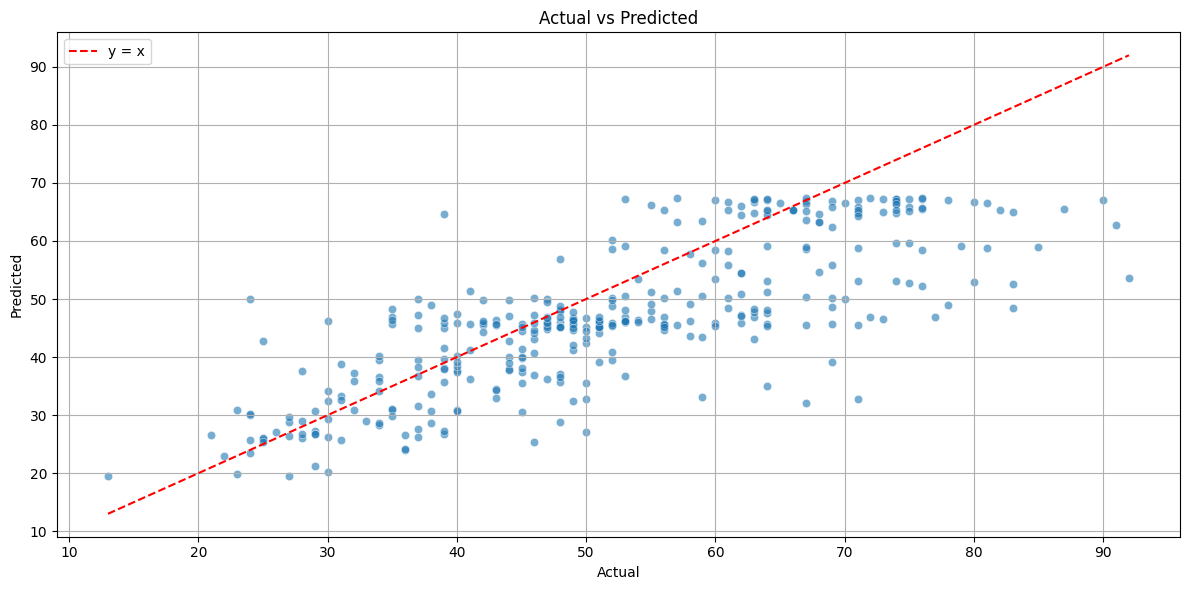

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:], y=y_pred_best, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

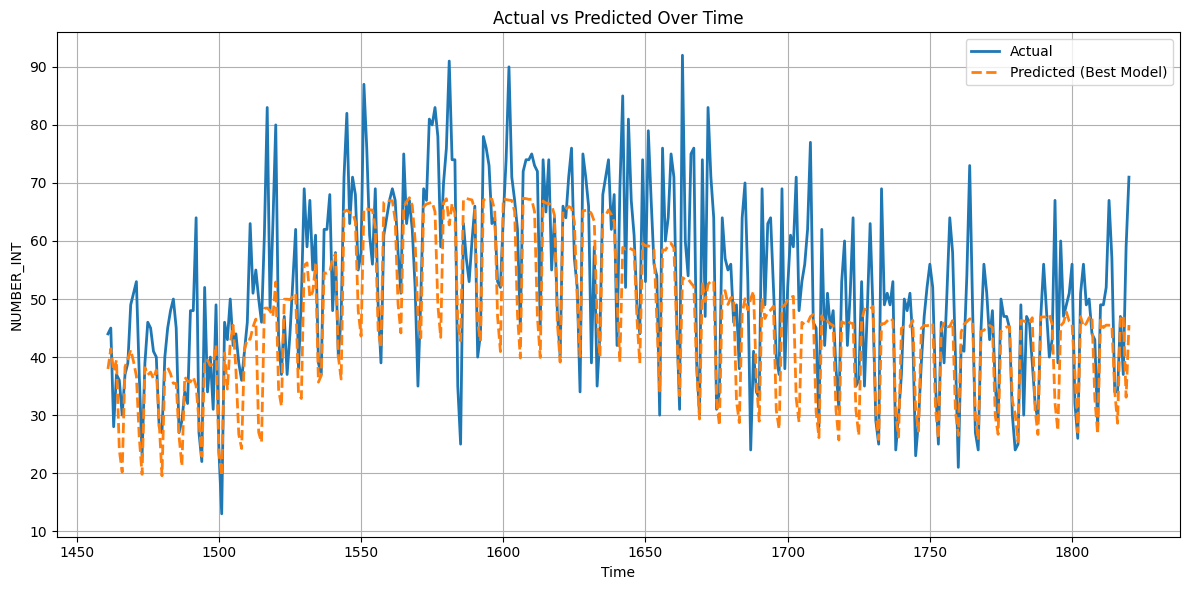

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val.values, label='Actual', linewidth=2)
plt.plot(y_val.index, y_pred_best, label='Predicted (Best Model)', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title(f'Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 30d

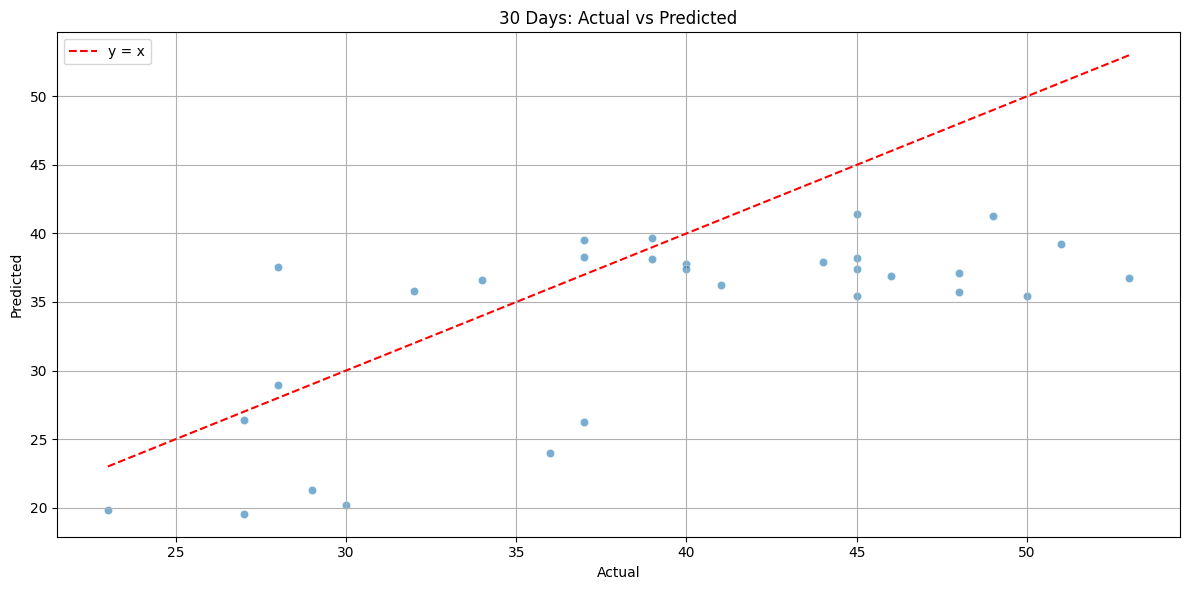

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:30], y=y_pred_best[:30], alpha=0.6)
plt.plot([y_val[:30].min(), y_val[:30].max()], [y_val[:30].min(), y_val[:30].max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('30 Days: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


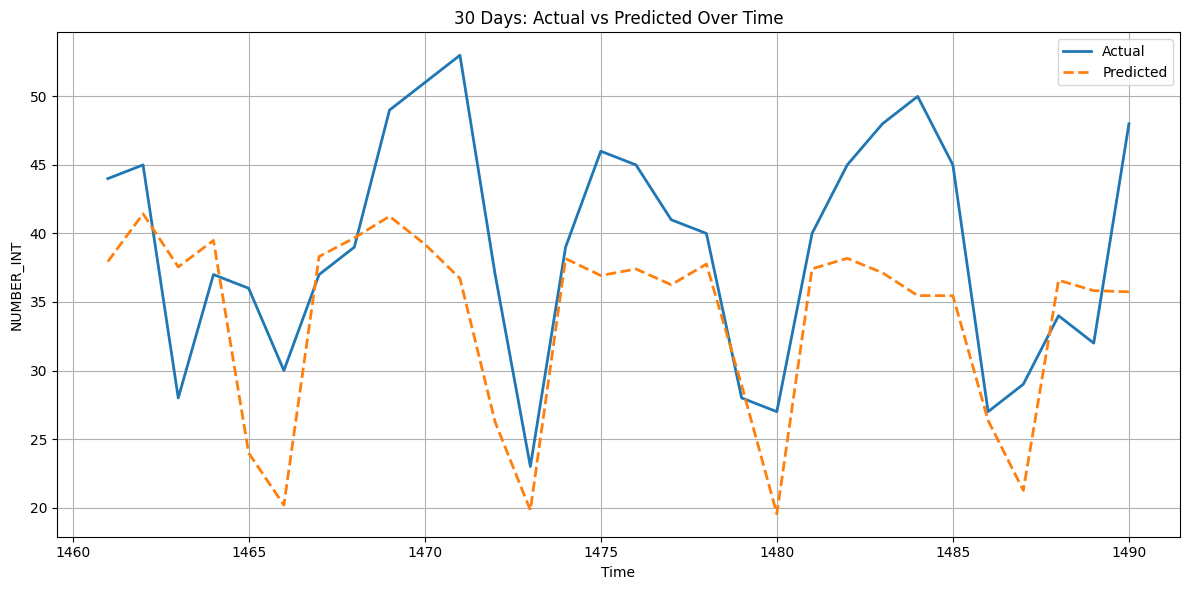

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index[:30], y_val[:30].values, label='Actual', linewidth=2)
plt.plot(y_val.index[:30], y_pred_best[:30], label='Predicted', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title('30 Days: Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

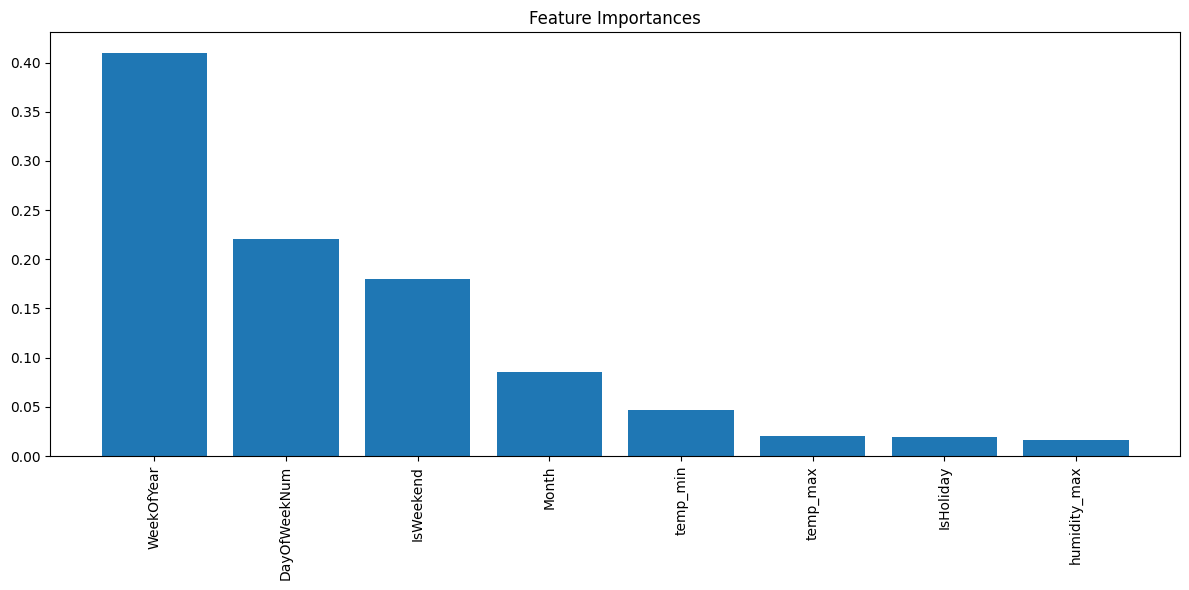

In [28]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()